In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('house_cleaned_categorical_var.csv')

In [3]:
df.head()

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [4]:
df.shape

(1460, 77)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
Unnamed: 0       1460 non-null int64
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-

In [6]:
numeric_var = df.select_dtypes(include=['int64','float64']).columns

In [7]:
numeric_nan_var = [feature for feature in df[numeric_var].columns if df[feature].isnull().sum()>0]

In [8]:
df[numeric_nan_var].isnull().sum()

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

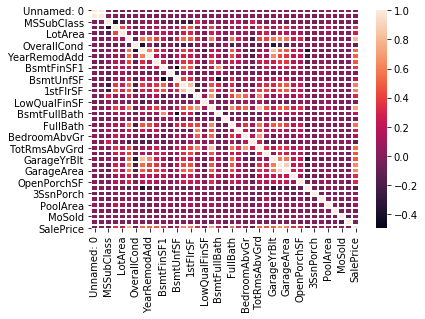

In [9]:
sns.heatmap(df.corr(), linewidth=1)

In [10]:
df.corr()

,Unnamed: 0,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Unnamed: 0,1.000000,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
Id,1.000000,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493


# filling numeric missing values using categorical variables on the basis of taking highly correlated with numeric missing feature and then takes mean, median, or mode accordingly

## like for LotFrontage :- i uses LotArea (bcz it is highly correlated cateforical feature)

In [11]:
df.corr()['LotFrontage'].nlargest(15)

LotFrontage     1.000000
1stFlrSF        0.457181
LotArea         0.426095
GrLivArea       0.402797
TotalBsmtSF     0.392075
TotRmsAbvGrd    0.352096
SalePrice       0.351799
GarageArea      0.344997
GarageCars      0.285691
Fireplaces      0.266639
BedroomAbvGr    0.263170
OverallQual     0.251646
BsmtFinSF1      0.233633
PoolArea        0.206167
FullBath        0.198769
Name: LotFrontage, dtype: float64

In [12]:
df['MSSubClass'].unique()

array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  85,  80, 160,  75,
       180,  40])

In [13]:
df['GarageCars']

0       2
1       2
2       2
3       3
4       3
       ..
1455    2
1456    2
1457    1
1458    1
1459    1
Name: GarageCars, Length: 1460, dtype: int64

In [14]:
df.corr()['MasVnrArea'].nlargest(10)

MasVnrArea      1.000000
SalePrice       0.477493
OverallQual     0.411876
GrLivArea       0.390857
GarageArea      0.373066
GarageCars      0.364204
TotalBsmtSF     0.363936
1stFlrSF        0.344501
YearBuilt       0.315707
TotRmsAbvGrd    0.280682
Name: MasVnrArea, dtype: float64

In [15]:
df['OverallQual'].unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2])

In [16]:
df.corr()['GarageYrBlt'].nlargest(10)

GarageYrBlt     1.000000
YearBuilt       0.825667
YearRemodAdd    0.642277
GarageCars      0.588920
GarageArea      0.564567
OverallQual     0.547766
SalePrice       0.486362
FullBath        0.484557
TotalBsmtSF     0.322445
MasVnrArea      0.252691
Name: GarageYrBlt, dtype: float64

In [17]:
df['YearBuilt'].unique()

array([2003, 1976, 2001, 1915, 2000, 1993, 2004, 1973, 1931, 1939, 1965,
       2005, 1962, 2006, 1960, 1929, 1970, 1967, 1958, 1930, 2002, 1968,
       2007, 1951, 1957, 1927, 1920, 1966, 1959, 1994, 1954, 1953, 1955,
       1983, 1975, 1997, 1934, 1963, 1981, 1964, 1999, 1972, 1921, 1945,
       1982, 1998, 1956, 1948, 1910, 1995, 1991, 2009, 1950, 1961, 1977,
       1985, 1979, 1885, 1919, 1990, 1969, 1935, 1988, 1971, 1952, 1936,
       1923, 1924, 1984, 1926, 1940, 1941, 1987, 1986, 2008, 1908, 1892,
       1916, 1932, 1918, 1912, 1947, 1925, 1900, 1980, 1989, 1992, 1949,
       1880, 1928, 1978, 1922, 1996, 2010, 1946, 1913, 1937, 1942, 1938,
       1974, 1893, 1914, 1906, 1890, 1898, 1904, 1882, 1875, 1911, 1917,
       1872, 1905])

## by eda i analysis that 
         #lotfrontage is correlated with garagecars,
        # masvnrarea with overallQlt
        # garageyrblt with yearbuilt

In [18]:
related_cat_feature = ['GarageCars','OverallQual','YearBuilt']

In [19]:
df[df['GarageCars'] == 2]['LotFrontage'].mean()

70.6246105919003

In [20]:
df[numeric_nan_var].isnull().sum()

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [21]:
df1 = df.copy()

In [22]:
df1.update(df[df.loc[:,'GarageCars']==1]['LotFrontage'].replace(np.nan, df[df.loc[:,'GarageCars']==1]['LotFrontage'].mean()))

In [23]:
df1['LotFrontage'].isnull().sum()

202

In [24]:
df['GarageCars'].dtype

dtype('int64')

In [25]:
df['LotFrontage'].isnull().sum()

259

In [26]:
df1['GarageYrBlt'].dtypes

dtype('float64')

In [27]:
for related, missing in zip(related_cat_feature,numeric_nan_var):
    for i in df[related].unique():
        mean = df[df.loc[:,related]==i][missing].mean()
        df1.update(df[df.loc[:,related]==i][missing].replace(np.nan,mean))
       


In [28]:
df1['GarageYrBlt'].dtypes

dtype('float64')

In [29]:
df1[numeric_nan_var].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    3
dtype: int64

In [30]:
df1['GarageYrBlt'].isnull().sum()

3

In [32]:
df1[df1.isnull().any(axis=1)].index

Int64Index([1137, 1234, 1349], dtype='int64')

In [33]:
df.loc[1137,'GarageYrBlt']

nan

In [34]:
for i in df1.isnull().any(axis=1).index:
    df1.loc[i,"GarageYrBlt"] = df1.loc[i,'YearBuilt']

In [35]:
num_var_miss = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt','YearBuilt']
df1[num_var_miss][df1[num_var_miss].isnull().any(axis=1)]

,LotFrontage,MasVnrArea,GarageYrBlt,YearBuilt


In [36]:
df1['YearBuilt'].value_counts() 

2006    67
2005    64
2004    54
2007    49
2003    45
        ..
1906     1
1911     1
1913     1
1917     1
1872     1
Name: YearBuilt, Length: 112, dtype: int64

In [37]:

pd.set_option('display.max_columns',81)
df1[df1.isnull().any(axis=1)]

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [38]:
df1.isnull().sum().sum()

0

In [39]:
pd.set_option('display.max_rows',1460)
df1['GarageYrBlt']

0       2003.0
1       1976.0
2       2001.0
3       1915.0
4       2000.0
5       1993.0
6       2004.0
7       1973.0
8       1931.0
9       1939.0
10      1965.0
11      2005.0
12      1962.0
13      2006.0
14      1960.0
15      1929.0
16      1970.0
17      1967.0
18      2004.0
19      1958.0
20      2005.0
21      1930.0
22      2002.0
23      1976.0
24      1968.0
25      2007.0
26      1951.0
27      2007.0
28      1957.0
29      1927.0
30      1920.0
31      1966.0
32      2007.0
33      1959.0
34      2005.0
35      2004.0
36      1994.0
37      1954.0
38      1953.0
39      1955.0
40      1965.0
41      1959.0
42      1983.0
43      1975.0
44      1959.0
45      2005.0
46      2003.0
47      2006.0
48      1920.0
49      1966.0
50      1997.0
51      1934.0
52      1963.0
53      1981.0
54      1955.0
55      1964.0
56      1999.0
57      2004.0
58      2006.0
59      1972.0
60      2004.0
61      1920.0
62      2006.0
63      1921.0
64      1997.0
65      2004.0
66      19

In [40]:
df1.shape

(1460, 77)

In [41]:
df.shape

(1460, 77)

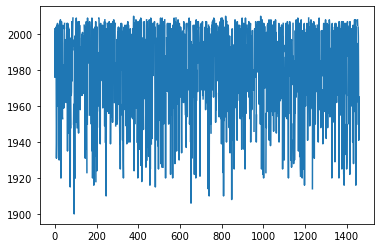

In [42]:
plt.plot(df['GarageYrBlt'])

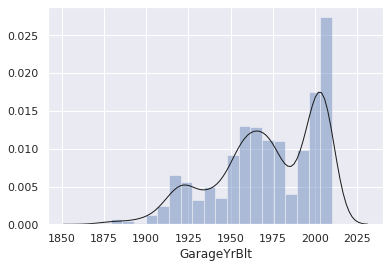

In [43]:
sns.set()
sns.distplot(df1['GarageYrBlt'], bins =20, kde_kws={'linewidth':1,'color':'k'})

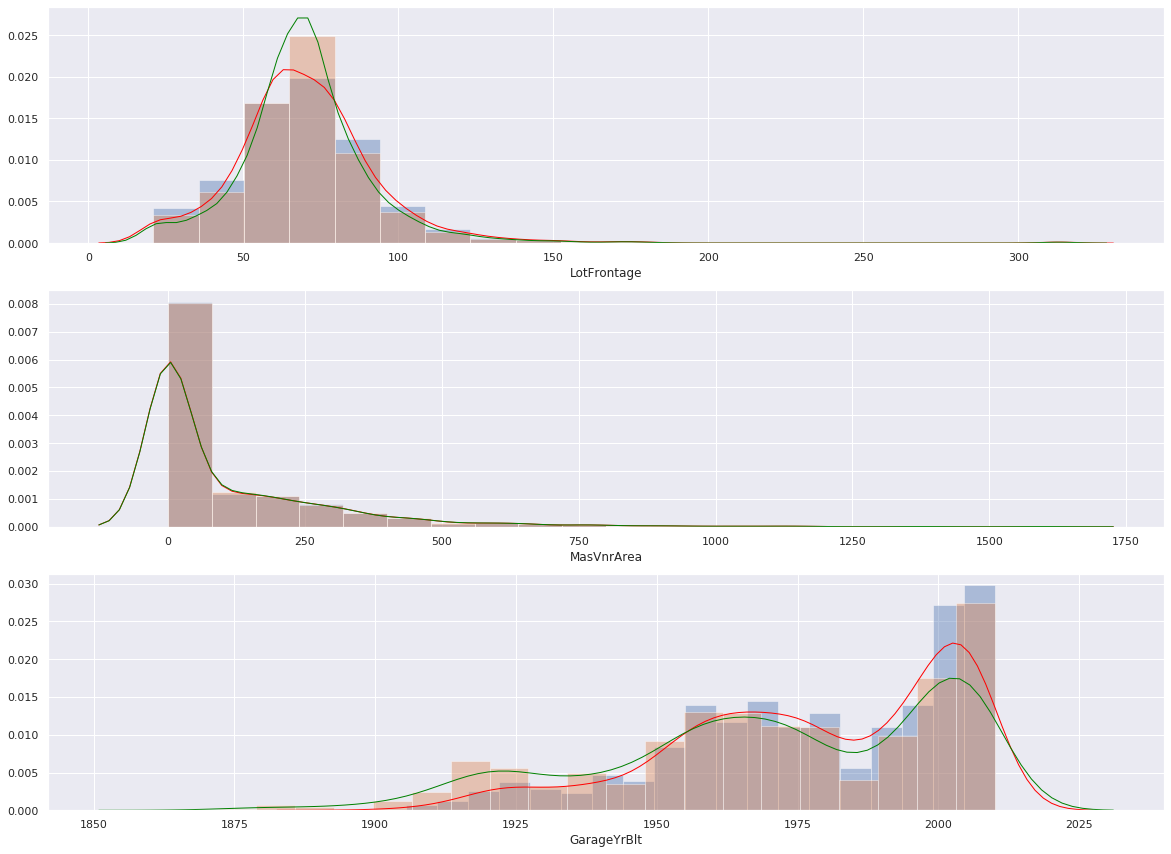

In [44]:
sns.set()
plt.figure(figsize=(20,20))
for n,i in enumerate(numeric_nan_var):
    plt.subplot(4,1,n+1)
    sns.distplot(df[i], bins=20, kde_kws={'linewidth':1,'color':'red'})
    sns.distplot(df1[i], bins=20, kde_kws={'linewidth':1,'color':'green'})

In [45]:
df1.to_csv('3rd-full-cleaned-data.csv')

In [46]:
df1['GarageYrBlt'].dtypes

dtype('float64')

In [47]:
df['GarageYrBlt'].dtypes

dtype('float64')